# Desafio

Construir uma tabela que avalia trimestralmente o resultado de vendas e plote um gráfico deste histórico.

O código SQL para criar e preencher a tabela esta na pasta sql_scripts, aqui demonstrarei o plot com o csv limpo gerado no arquivo desafio_parte1.ipynb

In [14]:
# Importando as bibliotecas necessárias e o csv
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("./data/DB_Teste_Limpo.csv", encoding="utf-8", sep=";")
df.head()

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor
0,Cliente 1,2017-0022,Serviços,02/01/2018,Novo Logo,Vendedor 1,Brasil,1,Time 1,24800.00
1,Cliente 10,2018-0088,Serviços,14/02/2018,Novo Logo,Vendedor 1,Brasil,6,Time 1,302720.00
2,Cliente 10,2018-0104,Serviços,13/03/2018,Upselling,Vendedor 1,Brasil,1,Time 1,51894.86
3,Cliente 10,2018-0168,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,51894.86
4,Cliente 10,2018-0169,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,51894.86


In [15]:
# Transformando o campo Data da Venda em datetime
df["Data da Venda"] = pd.to_datetime(df["Data da Venda"], dayfirst=True)

# Definindo o formato em quarter usando to_period
df["Trimestre"] = df["Data da Venda"].dt.to_period('Q')

df.head()

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor,Trimestre
0,Cliente 1,2017-0022,Serviços,2018-01-02,Novo Logo,Vendedor 1,Brasil,1,Time 1,24800.00,2018Q1
1,Cliente 10,2018-0088,Serviços,2018-02-14,Novo Logo,Vendedor 1,Brasil,6,Time 1,302720.00,2018Q1
2,Cliente 10,2018-0104,Serviços,2018-03-13,Upselling,Vendedor 1,Brasil,1,Time 1,51894.86,2018Q1
3,Cliente 10,2018-0168,Serviços,2018-04-30,Upselling,Vendedor 1,Brasil,2,Time 1,51894.86,2018Q2
4,Cliente 10,2018-0169,Serviços,2018-04-30,Upselling,Vendedor 1,Brasil,2,Time 1,51894.86,2018Q2


In [16]:
# Agrupando o DataFrame pelo trimestre e calculando os valores
resultado_trimestral = df.groupby("Trimestre")["Valor"].sum().reset_index()

# Convertendo os valores em Trimestre para facilitar a plotagem
resultado_trimestral["Trimestre"] = resultado_trimestral["Trimestre"].astype(str)

print(resultado_trimestral)

   Trimestre        Valor
0     2018Q1   9214708.51
1     2018Q2  24329411.79
2     2018Q3  17807820.99
3     2018Q4  28684705.77
4     2019Q1  14924051.07
5     2019Q2  48639438.83
6     2019Q3  35105020.45
7     2019Q4  41333096.43
8     2020Q1  72307629.80
9     2020Q2  49069698.10
10    2020Q3  52073231.25
11    2020Q4  43522269.02
12    2021Q1  47535693.63
13    2021Q2  33542666.98


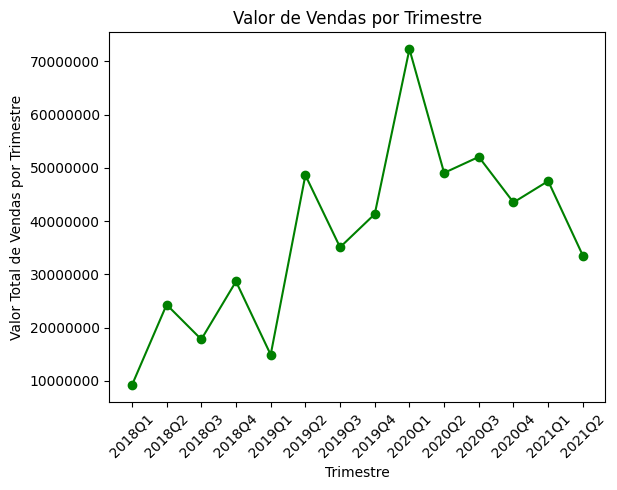

In [29]:
# Definindo o eixo x e y do gráfico, seu marcarcador e cor
plt.plot(resultado_trimestral["Trimestre"], resultado_trimestral["Valor"], marker='o', color="green")
# Alterando legendas do gráfico
plt.title('Valor de Vendas por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Valor Total de Vendas por Trimestre')
# Alternando notação da legenda
plt.ticklabel_format(style='plain', axis='y')
# Rotacionando legenda no eixo x para facilitar visualização
plt.xticks(rotation=45)
plt.show()